<a href="https://colab.research.google.com/github/ADEYEMIBolaji/The_Almanac_NCVO/blob/main/NCVO_DS_Task34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NCVO Data Scientist Interview Task**

*Thank you for applying for the data scientist role at NCVO! We are delighted to have your application.*

The data scientist will maintain our database and conduct analyses on the [UK Civil Society Almanac](https://data.ncvo.org.uk). This means getting to grips with financial data about charities.

For this task you will need two datasets:

*   The Charity Commission register
*   The UK-CAT classification categories for all charities (this is a classification system for charities by subsector)

The URLs to the datasets are below.

Please write code **in Python** below to complete the following:

1.    Merge the two datasets, to create a dataset of **active charities with their UK-CAT category tags**. Note that the Charity Commission register includes a unique charity number, and the UK-CAT dataset uses "GB-CHC-" followed by the charity number.
2.    Create a summary table reporting the **number of charities** and the **average, minimum and maximum** annual income in each of the 24 categories for **charities in England**. Note that each charity has multiple tags - you need the main category (two letter code), NOT the subcategory (five characters).

Finally, **create one data visualisation** (of your choice) based off the summary table. You can use **any tool of your choice** for this, inside or outside of this notebook - simply paste the link into the notebook if you are using another tool.

Please comment your code clearly.

In [ ]:
#Data Sources
cc_data_url = 'https://ccewuksprdoneregsadata1.blob.core.windows.net/data/txt/publicextract.charity.zip'
uk_cat_url = 'https://github.com/charity-classification/ukcat/raw/main/data/charities_active-ukcat.csv'

## **Preambles**


1.   Import Libraries
2.   Download & Extract data from Zip file
3.   Get data from txt format to pandas





In [ ]:
import random
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import  datetime
import warnings
warnings.filterwarnings('ignore')
import statistics
from scipy import stats

import requests
import zipfile
import io

In [ ]:
# Download the zip file
response = requests.get(cc_data_url)
response.raise_for_status()

In [ ]:
# Extract the contents of the zip file
with zipfile.ZipFile(io.BytesIO(response.content), 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [ ]:
#Import dataset
uk_cat = pd.read_csv(uk_cat_url)
uk_cat.head()

,org_id,ukcat_code
0,GB-CHC-1000000,ED
1,GB-CHC-1000000,ED102
2,GB-CHC-1000001,AR
3,GB-CHC-1000005,FA103
4,GB-CHC-1000005,RL


In [ ]:
#Profiling Uk-cat
print(uk_cat.shape)
print(uk_cat['ukcat_code'].nunique())
print(uk_cat['org_id'].nunique())

(801567, 2)
241
194175


In [ ]:
# Open the text file and read its first 5 lines
with open('/content/publicextract.charity.txt', 'r') as file:
    for _ in range(5):
        line = file.readline()
        print(line, end='')

date_of_extract	organisation_number	registered_charity_number	linked_charity_number	charity_name	charity_type	charity_registration_status	date_of_registration	date_of_removal	charity_reporting_status	latest_acc_fin_period_start_date	latest_acc_fin_period_end_date	latest_income	latest_expenditure	charity_contact_address1	charity_contact_address2	charity_contact_address3	charity_contact_address4	charity_contact_address5	charity_contact_postcode	charity_contact_phone	charity_contact_email	charity_contact_web	charity_company_registration_number	charity_insolvent	charity_in_administration	charity_previously_excepted	charity_is_cdf_or_cif	charity_is_cio	cio_is_dissolved	date_cio_dissolution_notice	charity_activities	charity_gift_aid	charity_has_land
2024-03-24 00:00:00.0000000	1	200027	1	POTTERNE MISSION ROOM AND TRUST		Removed	1962-05-17 00:00:00.0000000	2014-04-16 00:00:00.0000000																False	False								
2024-03-24 00:00:00.0000000	2	200027	2	HITCHAM FREE CHURCH		Registered	1962

In [ ]:
# Read the text file into a pandas DataFrame
cc_data = pd.read_csv('/content/publicextract.charity.txt',delimiter='\t', error_bad_lines=False)

# Display the first 5 rows of the DataFrame
cc_data.head()

Skipping line 176803: expected 34 fields, saw 61

Skipping line 233653: expected 34 fields, saw 61

Skipping line 327355: expected 34 fields, saw 61



,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,charity_insolvent,charity_in_administration,charity_previously_excepted,charity_is_cdf_or_cif,charity_is_cio,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land
0,2024-03-24 00:00:00.0000000,1,200027,1,POTTERNE MISSION ROOM AND TRUST,NaN,Removed,1962-05-17 00:00:00.0000000,2014-04-16 00:00:00.0000000,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-03-24 00:00:00.0000000,2,200027,2,HITCHAM FREE CHURCH,NaN,Registered,1962-05-17 00:00:00.0000000,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-03-24 00:00:00.0000000,3,200028,1,TOWN LANDS CHARITY FOR THE POOR,NaN,Removed,1961-10-19 00:00:00.0000000,1997-09-17 00:00:00.0000000,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-24 00:00:00.0000000,4,200028,2,TOWN LANDS CHARITY FOR THE CHURCH,NaN,Removed,1961-10-19 00:00:00.0000000,1997-09-17 00:00:00.0000000,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-24 00:00:00.0000000,5,200034,1,CLOPHILL RELIEF IN NEED CHARITY,NaN,Registered,1972-07-19 00:00:00.0000000,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Checking column names
cc_data.columns

Index(['date_of_extract', 'organisation_number', 'registered_charity_number',
       'linked_charity_number', 'charity_name', 'charity_type',
       'charity_registration_status', 'date_of_registration',
       'date_of_removal', 'charity_reporting_status',
       'latest_acc_fin_period_start_date', 'latest_acc_fin_period_end_date',
       'latest_income', 'latest_expenditure', 'charity_contact_address1',
       'charity_contact_address2', 'charity_contact_address3',
       'charity_contact_address4', 'charity_contact_address5',
       'charity_contact_postcode', 'charity_contact_phone',
       'charity_contact_email', 'charity_contact_web',
       'charity_company_registration_number', 'charity_insolvent',
       'charity_in_administration', 'charity_previously_excepted',
       'charity_is_cdf_or_cif', 'charity_is_cio', 'cio_is_dissolved',
       'date_cio_dissolution_notice', 'charity_activities', 'charity_gift_aid',
       'charity_has_land'],
      dtype='object')

In [ ]:
#Checking the number of unique values in linked_charity_number
cc_data['linked_charity_number'].nunique()

297

In [ ]:
#Subseting to check the uk-cat "GB-CHC-1000000"
cc_data[cc_data['registered_charity_number']==1000000]

,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,charity_insolvent,charity_in_administration,charity_previously_excepted,charity_is_cdf_or_cif,charity_is_cio,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land
174723,2024-03-24 00:00:00.0000000,1000000,1000000,0,THE ROYAL ANNIVERSARY TRUST,Trust,Registered,1990-08-03 00:00:00.0000000,NaN,Submission Received,...,False,False,False,NaN,False,False,NaN,To operate The Queen's Anniversary Prizes Sche...,False,False


In [ ]:
# Splitting the org_id column into two parts
uk_cat[['org_id_prefix','org_id_chc', 'organisation_number']] = uk_cat['org_id'].str.split('-', n=2, expand=True)

In [ ]:
uk_cat.head()

,org_id,ukcat_code,org_id_prefix,org_id_chc,organisation_number
0,GB-CHC-1000000,ED,GB,CHC,1000000
1,GB-CHC-1000000,ED102,GB,CHC,1000000
2,GB-CHC-1000001,AR,GB,CHC,1000001
3,GB-CHC-1000005,FA103,GB,CHC,1000005
4,GB-CHC-1000005,RL,GB,CHC,1000005


## **Extracting UKCAT Categories**

In [ ]:
# Function to extract first 2 characters or copy if there are just 2 characters
def extract_main_category(code):
    if len(code) >= 2:
        return code[:2]
    else:
        return code

In [ ]:
# Apply the function to create a new column
uk_cat['main_category'] = uk_cat['ukcat_code'].apply(extract_main_category)

In [ ]:
uk_cat.head()

,org_id,ukcat_code,org_id_prefix,org_id_chc,organisation_number,main_category
0,GB-CHC-1000000,ED,GB,CHC,1000000,ED
1,GB-CHC-1000000,ED102,GB,CHC,1000000,ED
2,GB-CHC-1000001,AR,GB,CHC,1000001,AR
3,GB-CHC-1000005,FA103,GB,CHC,1000005,FA
4,GB-CHC-1000005,RL,GB,CHC,1000005,RL


In [ ]:
#Discovery of other kind of organisation number
uk_cat[uk_cat['organisation_number']=='SC000001']

,org_id,ukcat_code,org_id_prefix,org_id_chc,organisation_number,main_category
675272,GB-SC-SC000001,AS,GB,SC,SC000001,AS
675273,GB-SC-SC000001,CA200,GB,SC,SC000001,CA
675274,GB-SC-SC000001,ED,GB,SC,SC000001,ED
675275,GB-SC-SC000001,FA103,GB,SC,SC000001,FA
675276,GB-SC-SC000001,LE105,GB,SC,SC000001,LE


In [ ]:
cc_data[cc_data['organisation_number']==200027]

,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,charity_insolvent,charity_in_administration,charity_previously_excepted,charity_is_cdf_or_cif,charity_is_cio,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land
34094,2024-03-24 00:00:00.0000000,200027,200027,0,RURAL MINISTRIES,Charitable company,Registered,1962-05-17 00:00:00.0000000,NaN,Submission Received,...,False,False,False,NaN,False,False,NaN,To support rural churches in their growth and ...,True,True


In [ ]:
#checking number of unique organisation_number in the table
cc_data['organisation_number'].nunique()

384121

In [ ]:
#Subsetting features for a better view
cc_data[['latest_acc_fin_period_start_date', 'latest_acc_fin_period_end_date',
       'latest_income', 'latest_expenditure', 'charity_contact_address1',
       'charity_contact_address2', 'charity_contact_address3',
       'charity_contact_address4', 'charity_contact_address5',
       'charity_contact_postcode', 'charity_contact_phone',
       'charity_contact_email', 'charity_contact_web',
       'charity_company_registration_number']]

,latest_acc_fin_period_start_date,latest_acc_fin_period_end_date,latest_income,latest_expenditure,charity_contact_address1,charity_contact_address2,charity_contact_address3,charity_contact_address4,charity_contact_address5,charity_contact_postcode,charity_contact_phone,charity_contact_email,charity_contact_web,charity_company_registration_number
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384116,NaN,NaN,NaN,NaN,St Aidan's Church,20 RADCLIFFE PARK,BAMBURGH,NaN,NaN,NE69 7AN,01668214748,revdlouisetk@greennet.org.uk,www.staidanbamburgh.co.uk,NaN
384117,NaN,NaN,NaN,NaN,WESTGATE C P SCHOOL,LANGRIDGE WAY,MORECAMBE,NaN,NaN,LA4 4XF,01524832747,friendsofwestgate@westgatesch.com,NaN,NaN
384118,NaN,NaN,NaN,NaN,LLANON CP SCHOOL,HEOL Y NANT,LLANNON,LLANELLI,NaN,SA14 6AE,07969696264,cylchmeithrinllannon4@gmail.com,NaN,NaN
384119,NaN,NaN,NaN,NaN,"Ysgol Cilgerran,","Cemaes Street,",Cilgerran,NaN,NaN,SA43 2SB,01239614226,ysgolcilgerranpta@gmail.com,NaN,NaN


## **Filter for Active Charities**

In [ ]:
df1 = cc_data[cc_data['charity_registration_status']!='Removed']

In [ ]:
df1.shape

(182902, 34)

In [ ]:
df1['organisation_number'].nunique()

182902

In [ ]:
#Access the shape
uk_cat.shape

(801567, 6)

In [ ]:
#Check for duplicates
df1[df1.duplicated()]

,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,charity_insolvent,charity_in_administration,charity_previously_excepted,charity_is_cdf_or_cif,charity_is_cio,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land


## **Merging UK-CAT & Charity Commission register**

In [ ]:
# Convert the 'organisation_number' column in df1 to object type
df1['organisation_number'] = df1['organisation_number'].astype(str)

In [ ]:
# Joining the tables based on 'id' column
merged_df = pd.merge(df1, uk_cat, on='organisation_number', how='left')

In [ ]:
merged_df.shape

(348489, 39)

In [ ]:
#Data Profiling
merged_df.isna().sum()

date_of_extract                             0
organisation_number                         0
registered_charity_number                   0
linked_charity_number                       0
charity_name                                0
charity_type                            14537
charity_registration_status                 0
date_of_registration                        0
date_of_removal                        348489
charity_reporting_status                14528
latest_acc_fin_period_start_date        23812
latest_acc_fin_period_end_date          23812
latest_income                           23812
latest_expenditure                      23812
charity_contact_address1                15205
charity_contact_address2                15457
charity_contact_address3                87354
charity_contact_address4               213665
charity_contact_address5               307370
charity_contact_postcode                16843
charity_contact_phone                   16078
charity_contact_email             

In [ ]:
#Subsetting features to confirm the data join
merged_df[['organisation_number','registered_charity_number','charity_name','org_id','ukcat_code']]

,organisation_number,registered_charity_number,charity_name,org_id,ukcat_code
0,2,200027,HITCHAM FREE CHURCH,NaN,NaN
1,5,200034,CLOPHILL RELIEF IN NEED CHARITY,NaN,NaN
2,6,200034,MARL ALLOTMENT,NaN,NaN
3,11,200040,THOMAS CARTER AND ANN MORDAUNT,NaN,NaN
4,12,200040,CHARLES HIGGINS FOR CLOTHING,NaN,NaN
...,...,...,...,...,...
348484,5237363,1207560,THE PAROCHIAL CHURCH COUNCIL OF THE ECCLESIAST...,NaN,NaN
348485,5237471,1207495,WESTGATE FRIENDS,NaN,NaN
348486,5237600,1207577,CYLCH MEITHRIN LLANNON,NaN,NaN
348487,5237709,1207557,RHIENI A FFRINDIAU YSGOL CILGERRAN,NaN,NaN


In [ ]:
merged_df[merged_df['charity_name']=='HITCHAM FREE CHURCH']

,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land,org_id,ukcat_code,org_id_prefix,org_id_chc,main_category
0,2024-03-24 00:00:00.0000000,2,200027,2,HITCHAM FREE CHURCH,NaN,Registered,1962-05-17 00:00:00.0000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Wrangling - Preparing data for analysis

In [ ]:
#Discovering duplicate charity names
dup = merged_df[merged_df.duplicated('charity_name')]

In [ ]:
merged_df['charity_name'].nunique()

179728

In [ ]:
merged_df['organisation_number'].nunique()

182902

In [ ]:
#Accessing the Duplicates stores to confirm their Organisation number
dup.head()

,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land,org_id,ukcat_code,org_id_prefix,org_id_chc,main_category
29,2024-03-24 00:00:00.0000000,41,200086,5,HENRY SMITH,NaN,Registered,1961-06-26 00:00:00.0000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,2024-03-24 00:00:00.0000000,95,200183,12,HENRY SMITH,NaN,Registered,1968-12-31 00:00:00.0000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,2024-03-24 00:00:00.0000000,141,200299,1,HENRY SMITH (WORTH ESTATE),NaN,Registered,1961-08-29 00:00:00.0000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,2024-03-24 00:00:00.0000000,150,200315,3,HENRY SMITH (WORTH ESTATE),NaN,Registered,1961-09-13 00:00:00.0000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2024-03-24 00:00:00.0000000,160,200382,1,HENRY SMITH'S CHARITY,NaN,Registered,1961-08-17 00:00:00.0000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Access the duplicate stores to confirm address
Stores_duplicate = dup[['organisation_number','linked_charity_number','charity_name','charity_contact_address1','ukcat_code','main_category']]

In [ ]:
#Random samples of Stores_duplicate
Stores_duplicate.sample(frac=0.024)

,organisation_number,linked_charity_number,charity_name,charity_contact_address1,ukcat_code,main_category
147918,523400,0,PICKERING RECREATION GROUND,9 Marshall Drive,LE105,LE
121061,502110,0,THE MARY JANE BOSTON MEMORIAL FUND,25 Farm Close,RL302,RL
225304,1048662,0,AISKEW LEEMING BAR CHURCH OF ENGLAND PRIMARY S...,14 Jubilee Road,ED106,ED
45597,250400,0,PROPERTY HELD FOR THE WHEATHAMPSTEAD WOMEN'S I...,320 Lower Luton Road,FA107,FA
153088,527463,0,LADY ANN RUSSELL FOUNDATION,7 COURT LEA,RL,RL
...,...,...,...,...,...,...
187235,1023018,0,WINTON PLAYGROUP,Winton Preschool,BE114,BE
165936,1000051,0,THE RONDO TRUST FOR THE PERFORMING ARTS,The Rondo Theatre,AR307,AR
153541,527813,0,EDUCATIONAL FOUNDATION OF THOMAS DURRAD,YEW HOUSE,ED106,ED
189467,1024763,0,EMBLETON AND WYTHOP SCHOOL FOUNDATION,14 SCAFELL CLOSE,BE115,BE


In [ ]:
#filtering for duplicates org. number in Stores_duplicate
dup[dup.duplicated('organisation_number')]

,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land,org_id,ukcat_code,org_id_prefix,org_id_chc,main_category
11213,2024-03-24 00:00:00.0000000,200012,200012,0,CHURCH AND POOR'S CHARITY,Other,Registered,1961-06-22 00:00:00.0000000,NaN,Submission Received,...,False,NaN,"TO PROVIDE RELIEF IN POVERTY, SICKNESS OR SUDD...",False,True,GB-CHC-200012,RL302,GB,CHC,RL
11214,2024-03-24 00:00:00.0000000,200012,200012,0,CHURCH AND POOR'S CHARITY,Other,Registered,1961-06-22 00:00:00.0000000,NaN,Submission Received,...,False,NaN,"TO PROVIDE RELIEF IN POVERTY, SICKNESS OR SUDD...",False,True,GB-CHC-200012,SW105,GB,CHC,SW
11218,2024-03-24 00:00:00.0000000,200023,200023,0,MOSSWOOD MISSION HALL (TRUST 1188),Other,Registered,1961-06-22 00:00:00.0000000,NaN,Submission Overdue,...,False,NaN,"Vicarage, parsonage, residence for curate, chu...",False,False,GB-CHC-200023,RL200,GB,CHC,RL
11221,2024-03-24 00:00:00.0000000,200024,200024,0,THE D'OYLY CARTE OPERA TRUST LIMITED,Charitable company,Registered,1961-06-12 00:00:00.0000000,NaN,Submission Received,...,False,NaN,The principal activities and objects of the ch...,False,True,GB-CHC-200024,ED,GB,CHC,ED
11224,2024-03-24 00:00:00.0000000,200027,200027,0,RURAL MINISTRIES,Charitable company,Registered,1962-05-17 00:00:00.0000000,NaN,Submission Received,...,False,NaN,To support rural churches in their growth and ...,True,True,GB-CHC-200027,RL305,GB,CHC,RL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245511,2024-03-24 00:00:00.0000000,1061177,1061177,0,THE MATTHEW HAYGARTH MEMORIAL TRUST FUND,Other,Registered,1997-03-07 00:00:00.0000000,NaN,Submission Received,...,False,NaN,Active assistance in the provision of resident...,False,False,GB-CHC-1061177,HO104,GB,CHC,HO
245516,2024-03-24 00:00:00.0000000,1061180,1061180,0,IVY MARY MACFIE DECEASED CHARITABLE FUND,Other,Registered,1997-03-07 00:00:00.0000000,NaN,Submission Received,...,False,NaN,To make grants to charitable institutions.The ...,False,False,GB-CHC-1061180,CV,GB,CHC,CV
245522,2024-03-24 00:00:00.0000000,1061183,1061183,0,THE UPPER WENSLEYDALE SPORTS AND RECREATIONAL ...,Charitable company,Registered,1997-03-07 00:00:00.0000000,NaN,Submission Received,...,False,NaN,Provision of sports and recreational facilities.,False,True,GB-CHC-1061183,LE106,GB,CHC,LE
245526,2024-03-24 00:00:00.0000000,1061190,1061190,0,1ST WARGRAVE SCOUT GROUP,Other,Registered,1997-03-07 00:00:00.0000000,NaN,Submission Received,...,False,NaN,Provides Scouting activities and training to y...,True,True,GB-CHC-1061190,ED300,GB,CHC,ED


In [ ]:
Stores_duplicate[Stores_duplicate['organisation_number']=='200012']

,organisation_number,linked_charity_number,charity_name,charity_contact_address1,ukcat_code,main_category
11212,200012,0,CHURCH AND POOR'S CHARITY,62 High Street,RL200,RL
11213,200012,0,CHURCH AND POOR'S CHARITY,62 High Street,RL302,RL
11214,200012,0,CHURCH AND POOR'S CHARITY,62 High Street,SW105,SW


In [ ]:
uk_cat[uk_cat['organisation_number']=='200012']

,org_id,ukcat_code,org_id_prefix,org_id_chc,organisation_number,main_category
483348,GB-CHC-200012,BE108,GB,CHC,200012,BE
483349,GB-CHC-200012,RL200,GB,CHC,200012,RL
483350,GB-CHC-200012,RL302,GB,CHC,200012,RL
483351,GB-CHC-200012,SW105,GB,CHC,200012,SW


In [ ]:
uk_cat['main_category'].nunique()

24

In [ ]:
#Renaming data but droping date of extract
Financials = merged_df.drop(columns=['date_of_extract'])

In [ ]:
Financials.head()

,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,latest_acc_fin_period_start_date,...,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land,org_id,ukcat_code,org_id_prefix,org_id_chc,main_category
0,2,200027,2,HITCHAM FREE CHURCH,NaN,Registered,1962-05-17 00:00:00.0000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,200034,1,CLOPHILL RELIEF IN NEED CHARITY,NaN,Registered,1972-07-19 00:00:00.0000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,200034,5,MARL ALLOTMENT,NaN,Registered,1961-07-07 00:00:00.0000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,200040,1,THOMAS CARTER AND ANN MORDAUNT,NaN,Registered,1961-06-29 00:00:00.0000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12,200040,2,CHARLES HIGGINS FOR CLOTHING,NaN,Registered,1961-06-29 00:00:00.0000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Financials[Financials['charity_name']=='HITCHAM FREE CHURCH']

,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,latest_acc_fin_period_start_date,...,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land,org_id,ukcat_code,org_id_prefix,org_id_chc,main_category
0,2,200027,2,HITCHAM FREE CHURCH,NaN,Registered,1962-05-17 00:00:00.0000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cc_data[cc_data['organisation_number']==2]

,date_of_extract,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,...,charity_insolvent,charity_in_administration,charity_previously_excepted,charity_is_cdf_or_cif,charity_is_cio,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land
1,2024-03-24 00:00:00.0000000,2,200027,2,HITCHAM FREE CHURCH,NaN,Registered,1962-05-17 00:00:00.0000000,NaN,NaN,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
uk_cat[uk_cat['organisation_number']=='200027']

,org_id,ukcat_code,org_id_prefix,org_id_chc,organisation_number,main_category
483359,GB-CHC-200027,EC105,GB,CHC,200027,EC
483360,GB-CHC-200027,RL200,GB,CHC,200027,RL
483361,GB-CHC-200027,RL305,GB,CHC,200027,RL


In [ ]:
uk_cat[uk_cat['organisation_number']=='2']

,org_id,ukcat_code,org_id_prefix,org_id_chc,organisation_number,main_category


### Feature Engineering

In [ ]:
# Convert to datetime format
Financials['latest_acc_fin_period_start_date'] = pd.to_datetime(Financials['latest_acc_fin_period_start_date'])
Financials['latest_acc_fin_period_end_date'] = pd.to_datetime(Financials['latest_acc_fin_period_end_date'])
Financials['date_of_registration']=pd.to_datetime(Financials['date_of_registration'])

In [ ]:
Financials.sample(frac=0.024)

,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,latest_acc_fin_period_start_date,...,cio_is_dissolved,date_cio_dissolution_notice,charity_activities,charity_gift_aid,charity_has_land,org_id,ukcat_code,org_id_prefix,org_id_chc,main_category
36146,234147,234147,0,RADLETT VILLAGE INSTITUTE,Other,Registered,1964-06-29,NaN,Submission Overdue,2021-04-01,...,False,NaN,MAINTAINS AND AMINISTERS THE INSTITUTE BUILDIN...,False,True,GB-CHC-234147,AR,GB,CHC,AR
320696,5111100,1176617,0,THE MEDWAY STREET ANGELS,Other,Registered,2018-01-11,NaN,Submission Received Late,2021-10-01,...,False,NaN,"The Medway street Angels, is a non-profit orga...",True,True,NaN,NaN,NaN,NaN,NaN
224055,1047898,1047898,0,BLUNDELLSANDS KINDERGARTEN PLAYGROUP,Other,Registered,1995-07-12,NaN,Submission Overdue,2020-09-01,...,False,NaN,Educational provision for children aged 2-5 ye...,False,True,GB-CHC-1047898,BE114,GB,CHC,BE
152072,526619,526619,0,THOMAS WHITHAM SIXTH FORM,Other,Registered,1966-10-13,NaN,Submission Double Default,2019-04-06,...,False,NaN,Provision of Scholarship Grants / Awards to yo...,False,False,GB-CHC-526619,ED300,GB,CHC,ED
253957,3964183,1076863,0,STRETHAM CHARITY,Other,Registered,1999-08-03,NaN,Submission Received,2022-01-01,...,False,NaN,The charity can assist any resident of Stretha...,False,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340083,5190993,1196779,0,IV PUBLISHING,CIO,Registered,2021-11-25,NaN,Submission Received,2022-06-01,...,False,NaN,"The charity publishes and sells books, holds m...",False,False,NaN,NaN,NaN,NaN,NaN
346298,5222701,1204445,0,"ST DAVID'S HOME FOR DISABLED SOLDIERS, SAILORS...",Charitable company,Registered,2023-08-22,NaN,New,NaT,...,False,NaN,THE OBJECTS OF THE CHARITY (OBJECTS) ARE: 3.1....,NaN,True,NaN,NaN,NaN,NaN,NaN
90013,294769,294769,0,THE SEAFORD DRAMATIC SOCIETY,Other,Registered,1986-07-02,NaN,Submission Received,2022-01-01,...,False,NaN,Seaford Little Theatre presents four plays eac...,False,True,GB-CHC-294769,AS105,GB,CHC,AS
221846,1046455,1046455,0,St Michael's Aldbourne PTA,Other,Registered,1995-05-16,NaN,Submission Received,2021-09-01,...,False,NaN,We raise funds for the village school by organ...,True,False,GB-CHC-1046455,RS103,GB,CHC,RS


In [ ]:
# Extract month and year
Financials['start_month'] = Financials['latest_acc_fin_period_start_date'].dt.month
Financials['start_year'] = Financials['latest_acc_fin_period_start_date'].dt.year
Financials['end_month'] = Financials['latest_acc_fin_period_end_date'].dt.month
Financials['end_year'] = Financials['latest_acc_fin_period_end_date'].dt.year
Financials['reg_month']= Financials['date_of_registration'].dt.month
Financials['reg_year']= Financials['date_of_registration'].dt.year

In [ ]:
Financials.sample(frac=0.0025)

,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,latest_acc_fin_period_start_date,...,ukcat_code,org_id_prefix,org_id_chc,main_category,start_month,start_year,end_month,end_year,reg_month,reg_year
76441,283692,283692,0,FELLOWSHIP FOR DECISIVE CHRISTIANITY,Other,Registered,1981-12-02,NaN,Submission Received,2021-11-01,...,BE115,GB,CHC,BE,11.0,2021.0,10.0,2022.0,12,1981
134068,513774,513774,0,THE STANTON WORKS BENEVOLENT FUND (1983),Trust,Registered,1983-04-01,NaN,Submission Overdue,2021-04-01,...,CA200,GB,CHC,CA,4.0,2021.0,3.0,2022.0,4,1983
189513,1024811,1024811,0,BRITISH SMALL ANIMAL VETERINARY ASSOCIATION,Charitable company,Registered,1993-09-01,NaN,Submission Received,2022-01-01,...,AS,GB,CHC,AS,1.0,2022.0,12.0,2022.0,9,1993
291400,5014737,1140156,0,WEST END PRE-SCHOOL LIMITED,Charitable company,Registered,2011-02-01,NaN,Submission Overdue,2021-03-31,...,NaN,NaN,NaN,NaN,3.0,2021.0,3.0,2022.0,2,2011
63257,272847,272847,0,CHIPPING BARNET SENIORS DAY CENTRE,Other,Registered,1977-02-10,NaN,Submission Received,2022-04-01,...,SC101,GB,CHC,SC,4.0,2022.0,3.0,2023.0,2,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323670,5123236,1181550,0,THE COWSHED,CIO,Registered,2019-01-14,NaN,Submission Received,2022-04-01,...,NaN,NaN,NaN,NaN,4.0,2022.0,3.0,2023.0,1,2019
33402,230461,230461,0,WOMEN'S INSTITUTE - CURDWORTH,Other,Registered,1963-10-10,NaN,Submission Received,2021-10-01,...,AS107,GB,CHC,AS,10.0,2021.0,9.0,2022.0,10,1963
317233,5097545,1172382,0,MUXTON PRIMARY SCHOOL PTFA,Other,Registered,2017-04-03,NaN,Submission Received,2022-01-01,...,NaN,NaN,NaN,NaN,1.0,2022.0,12.0,2022.0,4,2017
119407,328628,328628,0,THE LYRAS FAMILY CHARITABLE TRUST,Trust,Registered,1990-05-03,NaN,Submission Received,2022-01-01,...,RL,GB,CHC,RL,1.0,2022.0,12.0,2022.0,5,1990


In [ ]:
# Map month number to month name
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
Financials['start_month'] = Financials['start_month'].map(month_names)
Financials['end_month'] = Financials['end_month'].map(month_names)
Financials['reg_month']= Financials['reg_month'].map(month_names)

In [ ]:
Financials.sample(frac=0.0025)

,organisation_number,registered_charity_number,linked_charity_number,charity_name,charity_type,charity_registration_status,date_of_registration,date_of_removal,charity_reporting_status,latest_acc_fin_period_start_date,...,ukcat_code,org_id_prefix,org_id_chc,main_category,start_month,start_year,end_month,end_year,reg_month,reg_year
280120,4040041,1125313,0,NEW WORLD FOUNDATION,Charitable company,Registered,2014-04-30,NaN,Submission Overdue,2021-05-01,...,NaN,NaN,NaN,NaN,May,2021.0,April,2022.0,April,2014
41249,242664,242664,0,EDWARD SMITH,Other,Registered,1965-06-16,NaN,Submission Overdue,2021-01-01,...,CA202,GB,CHC,CA,January,2021.0,December,2021.0,June,1965
59522,269442,269442,0,RARE BREEDS SURVIVAL TRUST,Charitable company,Registered,1982-06-25,NaN,Submission Received,2022-01-01,...,AN,GB,CHC,AN,January,2022.0,December,2022.0,June,1982
103876,303984,303984,0,HORNING VILLAGE HALL,Other,Registered,1963-05-21,NaN,Submission Received,2022-01-01,...,ED,GB,CHC,ED,January,2022.0,December,2022.0,May,1963
229301,1050930,1050930,0,FISHERGATE PRIMARY SCHOOL (YORK) SCHOOL FUND,Other,Registered,1995-11-22,NaN,Submission Received,2021-09-01,...,ED106,GB,CHC,ED,September,2021.0,August,2022.0,November,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34666,232158,232158,0,THE PAROCHIAL CHARITY,Other,Registered,1983-03-04,NaN,Submission Received,2023-01-01,...,ED106,GB,CHC,ED,January,2023.0,December,2023.0,March,1983
236361,1055076,1055076,0,PEMBURY SCHOOL ASSOCIATION,Other,Registered,1996-05-02,NaN,Submission Received,2022-10-01,...,AS,GB,CHC,AS,October,2022.0,September,2023.0,May,1996
338947,5185352,1199118,0,The Cumbria Support Trust,Charitable company,Registered,2022-05-27,NaN,Submission Overdue,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,2022
162133,801632,801632,0,THE NALANDA TRUST,Other,Registered,1989-06-06,NaN,Submission Received,2022-01-01,...,HE,GB,CHC,HE,January,2022.0,December,2022.0,June,1989


In [ ]:
Financials[['charity_name','latest_income', 'latest_expenditure', 'charity_contact_address1','charity_contact_address2', 'charity_contact_address3',
       'charity_contact_address4', 'charity_contact_address5',
       'charity_contact_postcode','start_month', 'start_year', 'end_month', 'end_year']].sample(frac=0.24)

,charity_name,latest_income,latest_expenditure,charity_contact_address1,charity_contact_address2,charity_contact_address3,charity_contact_address4,charity_contact_address5,charity_contact_postcode,start_month,start_year,end_month,end_year
245372,THE STRETTONS MAYFAIR TRUST,647123.0,705314.0,Strettons Mayfair Trust,Mayfair Community Centre,Easthope Road,CHURCH STRETTON,NaN,SY6 6BL,January,2022.0,December,2022.0
277979,THE ROMAN CHARITABLE GIFT TRUST,40.0,40.0,277 CONNAUGHT ROAD,BROOKWOOD,WOKING,NaN,NaN,GU24 0AD,April,2021.0,April,2022.0
266336,LATHBURY INSTITUTE OR HALL,1134.0,0.0,13 ORCHARD STREET,BURY ST. EDMUNDS,NaN,NaN,NaN,IP33 1EH,January,2022.0,December,2022.0
227968,THE PRET FOUNDATION,1477298.0,1844319.0,Pret A Manger,10 Bressenden Place,LONDON,NaN,NaN,SW1E 5DH,January,2022.0,December,2022.0
173783,OLDFIELD SCHOOL ASSOCIATION,11042.0,5043.0,Oldfield Primary School,Bray Road,Maidenhead,NaN,NaN,SL6 1UE,August,2021.0,July,2022.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255673,NORTHAMPTON ASSOCIATION FOR ACCOMMODATION FOR ...,1608601.0,1519413.0,Chartlands Chambers,3 St. Giles Terrace,NORTHAMPTON,NaN,NaN,NN1 2BN,April,2022.0,March,2023.0
72359,6TH SEAFORD (ST LEONARD'S) SCOUT GROUP,8993.0,5122.0,4 North Camp Lane,SEAFORD,East Sussex,NaN,NaN,BN25 3AJ,January,2021.0,December,2021.0
301656,MANUDEN VILLAGE HALL AND SPORTS TRUST,71918.0,68401.0,Manuden Village Community Centre,David Collins Drive,Manuden,BISHOP'S STORTFORD,NaN,CM23 1EH,January,2022.0,December,2022.0
204693,DARJI MITRA MANDAL OF THE UNITED KINGDOM,83266.0,60046.0,88 QUEENBOROUGH GARDENS,ILFORD,NaN,NaN,NaN,IG2 6YB,April,2022.0,March,2023.0


# **Summary of Income by Categories**

In [ ]:
# Group by main_category and calculate statistics
summary_table = Financials.groupby('main_category')['latest_income'].agg(['count', 'mean', 'min', 'max']).reset_index()

In [ ]:
# Rename columns for clarity
summary_table.rename(columns={'count': 'Number_of_Charities', 'mean': 'Average_Annual_Income', 'min': 'Minimum_Annual_Income', 'max': 'Maximum_Annual_Income'}, inplace=True)

In [ ]:
summary_table

,main_category,Number_of_Charities,Average_Annual_Income,Minimum_Annual_Income,Maximum_Annual_Income
0,AF,1113,1.249394e+06,0.0,2.804130e+08
1,AN,1474,1.511135e+06,0.0,1.647020e+08
2,AR,13949,6.380365e+05,0.0,8.733348e+08
3,AS,24336,1.372740e+05,0.0,2.804130e+08
4,BE,34496,8.668921e+05,0.0,3.813000e+08
5,CA,15459,7.156008e+05,0.0,5.022912e+08
6,CC,4610,2.891707e+05,0.0,2.804130e+08
7,CJ,329,5.029947e+06,0.0,3.152504e+08
8,CV,12087,4.966832e+05,0.0,1.147196e+09
9,EC,3158,1.082137e+06,0.0,4.006000e+08


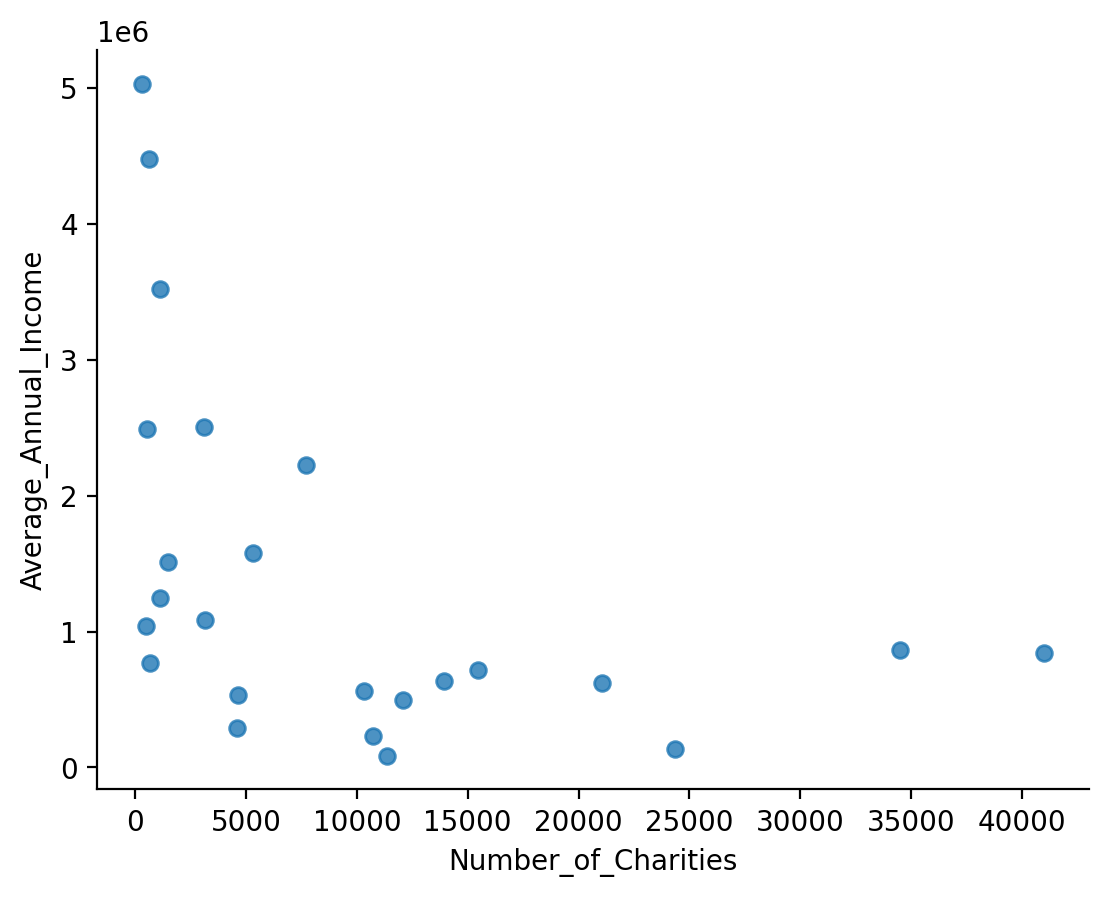

In [ ]:
# @title Number_of_Charities vs Average_Annual_Income

from matplotlib import pyplot as plt
summary_table.plot(kind='scatter', x='Number_of_Charities', y='Average_Annual_Income', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

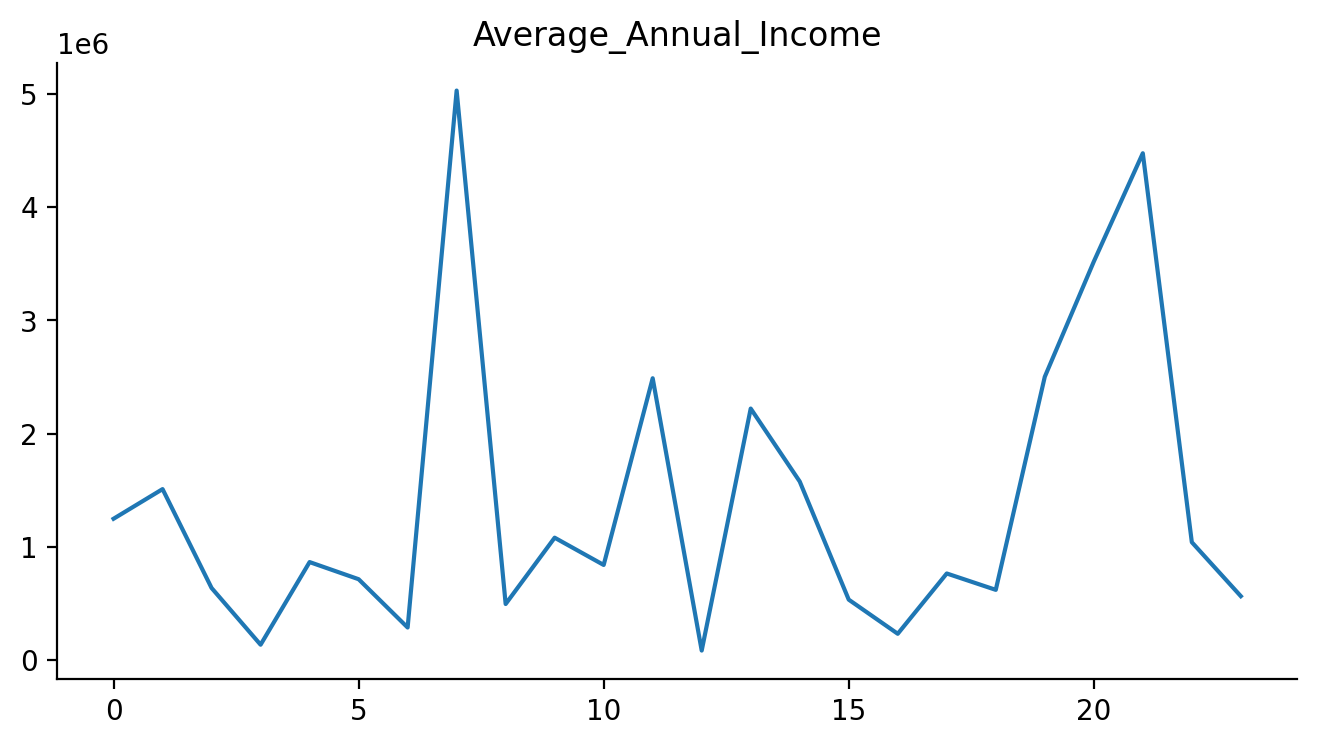

In [ ]:
# @title Average_Annual_Income

from matplotlib import pyplot as plt
summary_table['Average_Annual_Income'].plot(kind='line', figsize=(8, 4), title='Average_Annual_Income')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
Financials[Financials['main_category']=='AF'].shape

(1114, 44)

In [ ]:
Financials[(Financials['main_category']=='AF') & (Financials['latest_income']==0)].shape

(46, 44)

# **Dowloading the Transformed Data, then stored on Postgres using a localhost server.**
## **Visuals for Summary and Other Insights using Power BI**

`# Export DataFrame to CSV`
`Financials.to_csv('Financials.csv', index=False)

`The Link below contains the PDF and Pbix documents of the report, to give you option of hovering around the dashboard. `

https://stummuac-my.sharepoint.com/:f:/g/personal/22532755_stu_mmu_ac_uk/EhsDOhEB8_1OgxkeIct3A8EB-k49B8dHlrojyUtViRRMQg?e=8vMeUb


`N:B- This is due to my limited access to power bi workspace features`
`

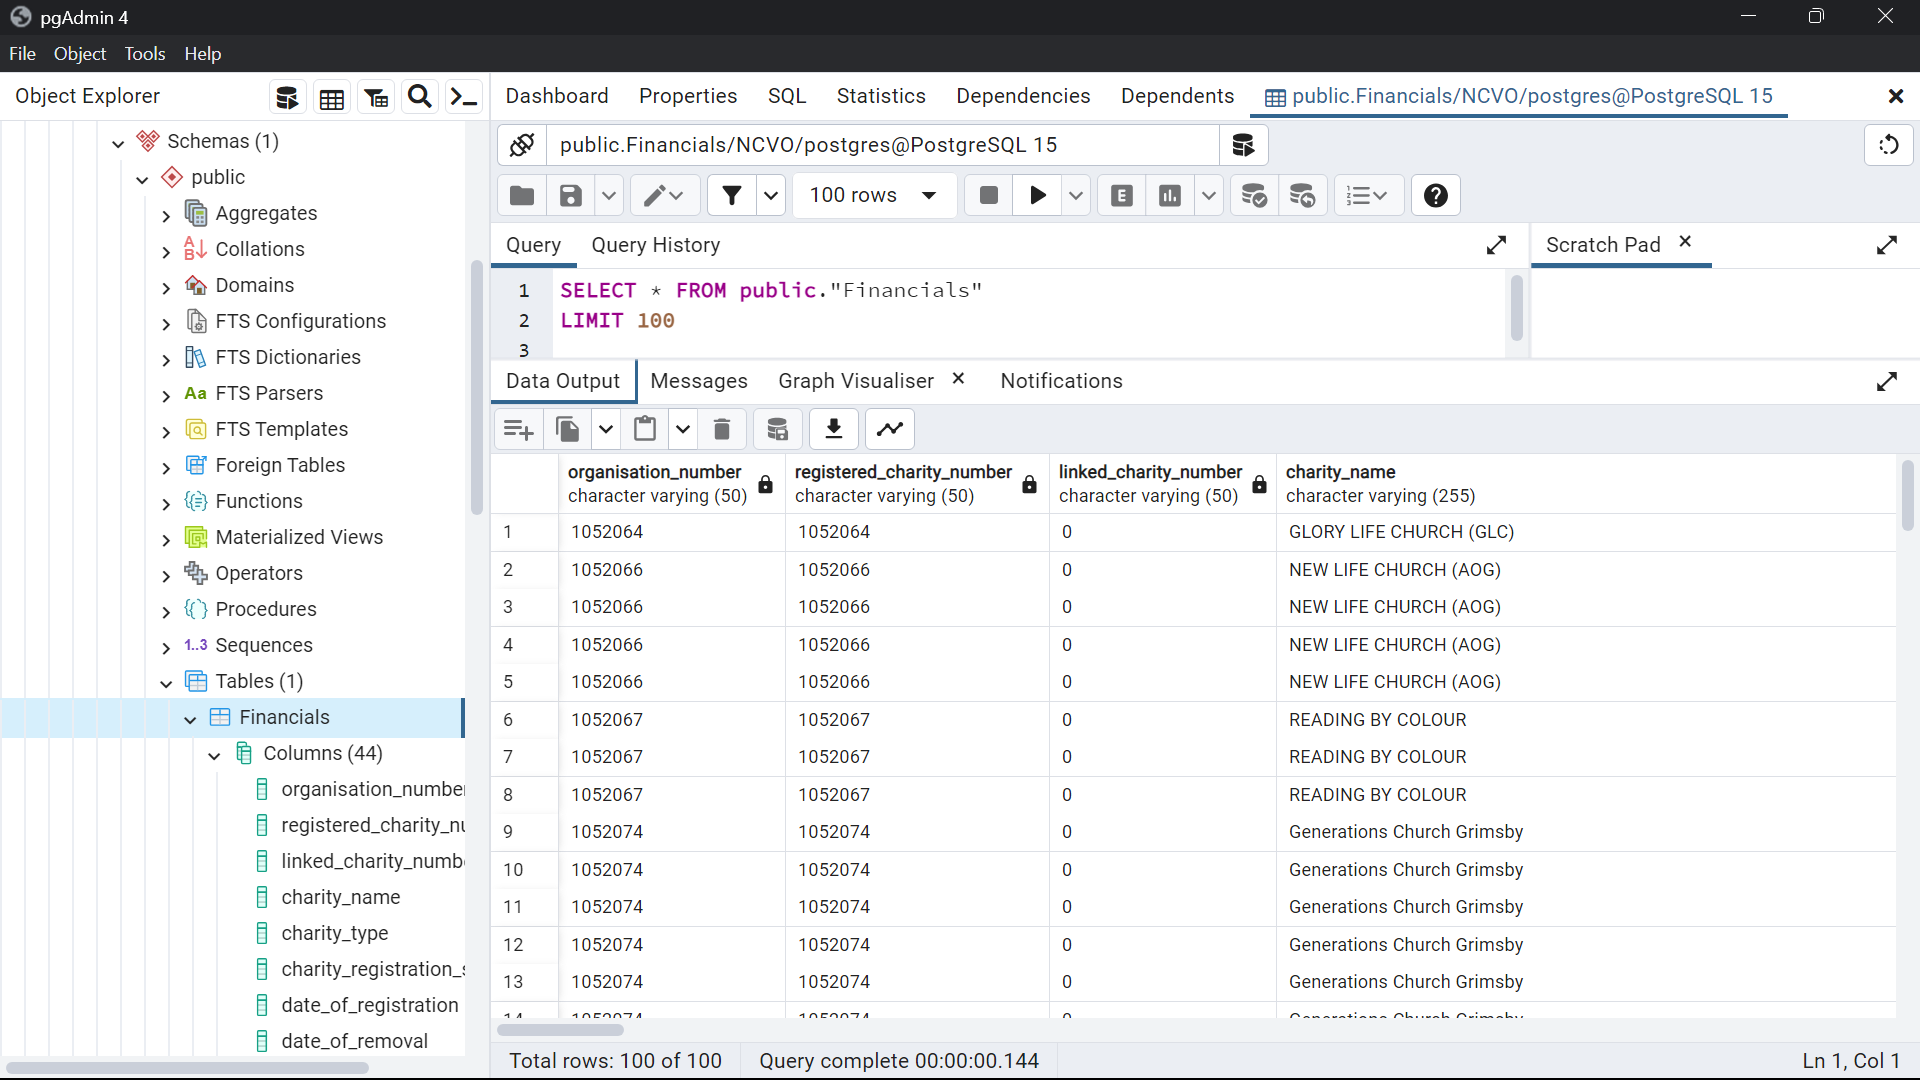